## Imports

In [1]:
import os
import sys
sys.path.append('/home/sardarchitect/repos/github.com/ucsd_capstone/')

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Upload Video

In [3]:
# Select uploaded file
video_path = '/home/sardarchitect/repos/github.com/ucsd_capstone/virat/videos/VIRAT_S_010003_11_000956_000982.mp4'

## Preprocessing

## Inference

In [4]:
from streetstudy.model import yolo
model = yolo.yolov5()
predictions = yolo.predict(model, video_path)

Using cache found in /home/sardarchitect/.cache/torch/hub/ultralytics_yolov5_master


requirements: /home/sardarchitect/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5 🚀 2023-4-30 Python-3.11.3 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 539/539 [00:09<00:00, 59.02it/s]


In [5]:
predictions.shape

torch.Size([467, 7])

## Post-processing

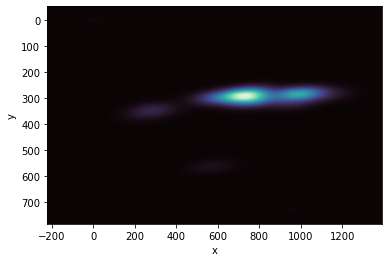

In [6]:
from streetstudy.common import display
%matplotlib inline

x = (predictions[:, 1] + (predictions[:, 3] / 2)).cpu().numpy()
df = np.column_stack((x,(predictions[:, 2] + (predictions[:, 4])).cpu().numpy()))

df = pd.DataFrame(df, columns=['x', 'y'])
display.display_heatmap(df)

## Conclusion